In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import glob

import os 
cwd = os.getcwd()

In [2]:
# This turns a basic .csv into a text file that can be read by the IRSA website

file_in = open(cwd +'/Data/LIRG_sample_coords.csv','r')
# change below to 'w' if you need to run this again
file_out = open(cwd + '/Data/LIRG_sample_coords_DEG.tbl','r')
file_out.write('|   ra      |    dec    |\n')
file_out.write('|   double  |    double |\n')
i=0
for line in file_in :
    # Do not run unless needed, you have to do some annoying manual edits to get IRSA to read it
    break
    line = line[0:-2]
    line_list = line.split(',')
    coords = SkyCoord(line_list[0],line_list[1], frame='icrs', unit=(u.hourangle, u.deg))
    #coords.
    #print(coords.ra.deg,coords.dec.deg)
    file_out.write(' ' + str(np.round(coords.ra.deg,5)) + '      '  + str(np.round(coords.dec.deg,5)) + '\n')
    #i = i+1
    #if i >5 :
    #    break
    
file_out.close()

UnsupportedOperation: not writable

In [98]:
# Output from the IRSA website has all the LIRG data. This splits it into individual text files corresponding 
# to the individual LIRGS so they are easier to parse.

# Have to link the numbers to names.
gal_dict = {}
galnames_file = open(cwd + '/Data/WISE_gal_data/gal_names.txt','r')
for i in range(1,145):
    i =str(i)
    gal_dict[i]=galnames_file.readline()[0:-1]
#print(gal_dict)    
galnames_file.close()    

WISE_gals = open(cwd + '/Data/WISE_data_all_LIRGS_10arcsec.tbl','r')
index_old = 0
firstline = ''
for line in WISE_gals :
    line_list = line.split()
    if '\\' in line:
        continue
    if '|' in line :
        firstline = firstline + line
        continue
    #print(line_list)
    index = line_list[0]
    #print(index)
    if index == index_old :
        text_out.write(line)
    elif index != '1' :
        text_out.close()
        text_out = open(cwd +'/Data/WISE_gal_data/WISE_gal_' +  gal_dict[index] + '.tbl','w')
        text_out.write(firstline)
        text_out.write(line)
    elif index == '1' :
        text_out = open(cwd + '/Data/WISE_gal_data/WISE_gal_' + gal_dict[index] + '.tbl','w')
        text_out.write(firstline)
        text_out.write(line)
    index_old = line_list[0]
#     if index == '3' :
#         break
        

In [ ]:
#If you need help!
#help(WISE.WISE_Data)

In [2]:
#Lets process the data in a succint way

from importnb import Notebook
from importlib import reload
with Notebook(): 
        import WISE_module as WISE
with Notebook(): __name__ == '__main__' and reload(WISE)
        

data_files = glob.glob(cwd + '/Data/WISE_gal_data/WISE*.tbl')
#print(data_files)
gals = {}
for item in data_files :
    # Uncomment lines if you want more processing, but it will start to get heavy
    source = item.split('_')[-1][0:-4]
    print(item,source)
    galaxy = WISE.WISE_Data(item,source=source,allowed_sep=1.5)
    #galaxy.position_diag()
    #galaxy.phot_diag()
    #galaxy.filter_data()
    #galaxy.bin_data(plot='no')
    #galaxy.plot_data()
    #galaxy.write()
    gals[source] = galaxy


print(len(galaxy.data['w1mag']))

/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_IRASF03359+1523.tbl IRASF03359+1523
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_UGC01845.tbl UGC01845
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_NGC5734.tbl NGC5734
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_NGC6745.tbl NGC6745
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_CGCG049057.tbl CGCG049057
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_NGC6621.tbl NGC6621
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_NGC3110.tbl NGC3110
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_IRASF08339+6517.tbl IRASF08339+6517
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_NGC0992.tbl NGC0992
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_UGC03410.tbl UGC03410
/home/treynolds/da

/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_NGC0232.tbl NGC0232
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_NGC7674.tbl NGC7674
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_IRASF060762139.tbl IRASF060762139
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_CGCG142034.tbl CGCG142034
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_IRAS05442+1732.tbl IRAS05442+1732
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_IC1623A.tbl IC1623A
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_IRASF171381017.tbl IRASF171381017
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_NGC6052.tbl NGC6052
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_NGC7591.tbl NGC7591
/home/treynolds/data/LIRGS/WISE/WISE_analysis/Data/WISE_gal_data/WISE_gal_NGC5653.tbl NGC5653
/home/treyno

AttributeError: 'WISE_Data' object has no attribute 'data'

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set OBSGEO-B to    28.757278 from OBSGEO-[XYZ].
Set OBSGEO-H to     2378.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


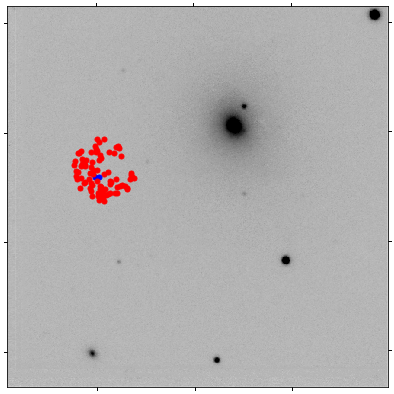

In [5]:
#print(gals.keys())
gal = gals['NGC1275']
gal.position_diag(cut=[[500,1000],[500,1000]])
#gal.phot_diag()

In [8]:
with Notebook(): __name__ == '__main__' and reload(WISE)


AttributeError: 'NoneType' object has no attribute 'name'